In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
#加载seealsology-data.tsv数据
data=pd.read_csv('seealsology-data.tsv',sep='\t')

In [16]:
print(data)

                                         source  \
0                                life insurance   
1                                life insurance   
2                                life insurance   
3                                life insurance   
4                                life insurance   
...                                         ...   
3739                              health system   
3740                              health system   
3741                      health administration   
3742                      health administration   
3743  ansi 834 enrollment implementation format   

                               target  depth  
0      corporate-owned life insurance      1  
1          critical illness insurance      1  
2                    economic capital      1  
3                     estate planning      1  
4              false insurance claims      1  
...                               ...    ...  
3739             two-tier health care      4  
3740       

In [11]:
#定义随机游走，node为节点，path_length为被遍历的路径长度
def get_randomwalk(node, path_length):
    random_walk = [node]
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node        
    return random_walk

In [18]:
#构造图
G = nx.from_pandas_edgelist(data,'source', 'target',edge_attr=True)
print(len(G))

2399


In [19]:
# 获取所有节点的列表
all_nodes = list(G.nodes())

In [20]:
#捕获所有节点的随机游走序列
random_walks = []
for n in tqdm(all_nodes):
# 每个节点游走5次，每次最长距离为10
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))

100%|████████████████████████████████████| 2399/2399 [00:00<00:00, 7567.39it/s]


In [21]:
print(random_walks)

[['life insurance', 'critical illness insurance', 'permanent life insurance', 'return of premium life insurance'], ['life insurance', 'general insurance', 'permanent life insurance', 'economic capital', 'raroc', 'risk return ratio', 'value at risk', 'cyber risk quantification'], ['life insurance', 'insurance in the united states', 'national association of insurance commissioners', 'insurance law', 'australian insurance law', 'insurance in australia', 'margin on services'], ['life insurance', 'pet insurance', 'permanent life insurance', 'retirement plan', 'generational accounting', 'wealth (economics)', 'working time'], ['life insurance', 'life expectancy', 'mitohormesis', 'maximum lifespan', 'dna damage theory of aging', 'eternal youth', 'ageless', 'rejuvenation', 'fountain of youth', 'rejuvenation (aging)'], ['corporate-owned life insurance', 'h. h. holmes', 'insurance fraud', 'insurance', 'welfare state', 'transfer payment'], ['corporate-owned life insurance', 'h. h. holmes', 'insura

In [26]:
# 使用skip-gram，提取模型权重
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

# 训练模型，window:设置当前词与预测词在一个句子中的最大距离是5;sg:采用skip-gram算法;hs:使用负采样；初始学习率为0.03，最小学习率为0.0007,
model = Word2Vec(window =5, sg = 1, hs = 0,negative = 10,alpha=0.03, min_alpha=0.0007,seed = 14)
# 从random_walks中创建词汇表
model.build_vocab(random_walks, progress_per=2)
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)
print(model)
# 输出和critical illness insurance相关的页面
print(model.similar_by_word('critical illness insurance'))

Word2Vec(vocab=2399, size=100, alpha=0.03)
[('total permanent disability insurance', 0.9591771364212036), ('tontine', 0.8843247294425964), ('return of premium life insurance', 0.8423848152160645), ('x12 document list', 0.8403811454772949), ('insurance regulatory information system', 0.8274177312850952), ('internal revenue code section 79', 0.8231074810028076), ("servicemembers' group life insurance", 0.8204159736633301), ('health insurance exchange', 0.8179696798324585), ('pet insurance', 0.81685471534729), ('family income benefit insurance', 0.8141626119613647)]


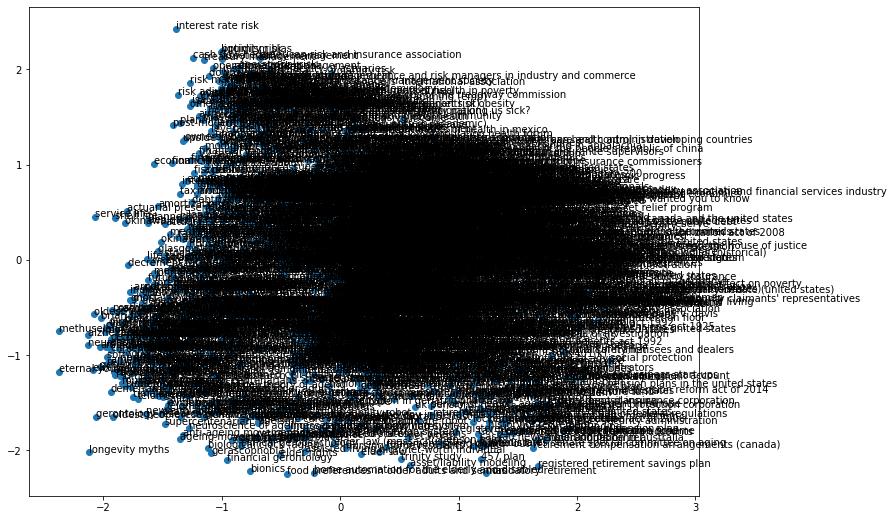

In [27]:
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = model[word_list]
    #print(type(X))
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()
# 将所有的Wikipidea页面embedding进行绘制
plot_nodes(model.wv.vocab)